In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('teen_phone_addiction_dataset (1).csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 3000 rows, 25 columns


In [ ]:
academic_performance = df['Academic_Performance']
display(academic_performance)

,Academic_Performance
0,78
1,70
2,93
3,78
4,56
...,...
2995,53
2996,93
2997,98
2998,67


In [ ]:
academic_performance_array = academic_performance.to_numpy()
academic_performance_subset = academic_performance_array[:50]
display(academic_performance_subset)

array([78, 70, 93, 78, 56, 89, 89, 70, 79, 89, 74, 70, 70, 95, 79, 97, 87,
       80, 96, 69, 83, 92, 60, 79, 85, 78, 65, 50, 77, 63, 59, 86, 87, 50,
       59, 64, 62, 65, 67, 68, 77, 96, 89, 89, 88, 60, 67, 67, 69, 91])

In [ ]:
k = int(input("Enter the number of clusters (k): "))
print(f"Number of clusters (k) set to: {k}")

Enter the number of clusters (k): 7
Number of clusters (k) set to: 7


In [ ]:
np.random.seed(42)
random_indices = np.random.choice(len(academic_performance_array), size=k, replace=False)
centroids = academic_performance_array[random_indices]
print("Initial cluster means:")
print(centroids)

Initial cluster means:
[51 74 76 77 77 83 95]


In [ ]:
previous_centroids = []

iteration = 0
while not np.array_equal(centroids, previous_centroids):
    iteration += 1
    previous_centroids = np.copy(centroids)

    clusters = [[] for _ in range(k)]
    cluster_assignments = []

    for data_point in academic_performance_subset: # Use the subset here
        distances = [np.linalg.norm(data_point - centroid) for centroid in centroids]
        closest_centroid_index = np.argmin(distances)
        clusters[closest_centroid_index].append(data_point)
        cluster_assignments.append(closest_centroid_index)


    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            new_centroids.append(np.mean(cluster, axis=0))
        else:
            new_centroids.append(previous_centroids[len(new_centroids)])


    centroids = np.array(new_centroids)

    print(f"Iteration {iteration}:")
    print("Cluster Assignments:")
    for i, cluster in enumerate(clusters):
        print(f"  Cluster {i}: {len(cluster)} data points")
        print(f"  Cluster {i} values: {[int(val) for val in cluster]}") # Print raw integer values
    print("Updated Cluster Means:")
    print(centroids)

Iteration 1:
Cluster Assignments:
  Cluster 0: 8 data points
  Cluster 0 values: [56, 60, 50, 59, 50, 59, 62, 60]
  Cluster 1: 15 data points
  Cluster 1 values: [70, 70, 74, 70, 70, 69, 65, 63, 64, 65, 67, 68, 67, 67, 69]
  Cluster 2: 0 data points
  Cluster 2 values: []
  Cluster 3: 9 data points
  Cluster 3 values: [78, 78, 79, 79, 80, 79, 78, 77, 77]
  Cluster 4: 0 data points
  Cluster 4 values: []
  Cluster 5: 11 data points
  Cluster 5 values: [89, 89, 89, 87, 83, 85, 86, 87, 89, 89, 88]
  Cluster 6: 7 data points
  Cluster 6 values: [93, 95, 97, 96, 92, 96, 91]
Updated Cluster Means:
[57.         67.86666667 76.         78.33333333 77.         87.36363636
 94.28571429]
Iteration 2:
Cluster Assignments:
  Cluster 0: 8 data points
  Cluster 0 values: [56, 60, 50, 59, 50, 59, 62, 60]
  Cluster 1: 14 data points
  Cluster 1 values: [70, 70, 70, 70, 69, 65, 63, 64, 65, 67, 68, 67, 67, 69]
  Cluster 2: 1 data points
  Cluster 2 values: [74]
  Cluster 3: 7 data points
  Cluster 3 valu

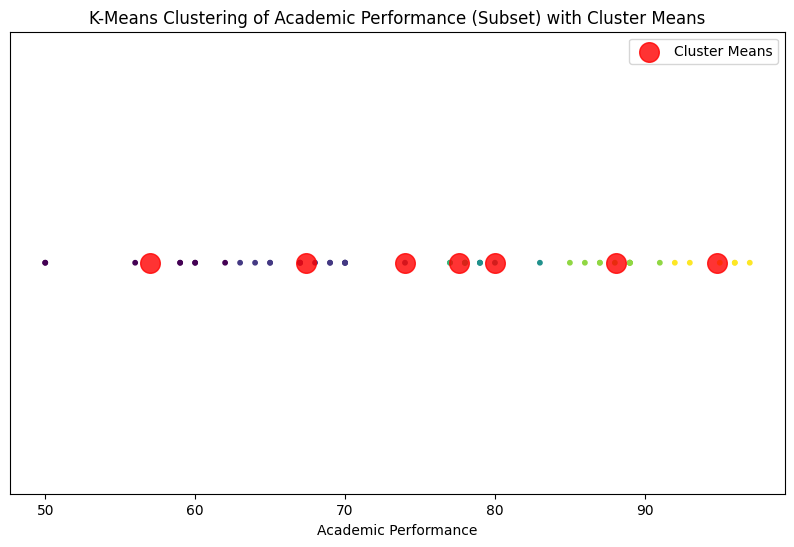

In [ ]:
# Assign each data point to the final cluster
final_cluster_assignments = []
for data_point in academic_performance_subset: # Use the subset here
    distances = [np.linalg.norm(data_point - centroid) for centroid in centroids]
    closest_centroid_index = np.argmin(distances)
    final_cluster_assignments.append(closest_centroid_index)

# Create a scatter plot of the data points colored by their cluster assignment
plt.figure(figsize=(10, 6))
plt.scatter(academic_performance_subset, np.zeros_like(academic_performance_subset), c=final_cluster_assignments, cmap='viridis', s=10) # Use subset here

# Mark the final centroids
plt.scatter(centroids, np.zeros_like(centroids), c='red', s=200, alpha=0.8, label='Cluster Means')

plt.title('K-Means Clustering of Academic Performance (Subset) with Cluster Means') # Update title
plt.xlabel('Academic Performance')
plt.yticks([]) # Hide the y-axis as it's 1-dimensional data
plt.legend()
plt.show()

In [ ]:
performance_usage_array = df[['Academic_Performance', 'Daily_Usage_Hours']].to_numpy()
performance_usage_subset = performance_usage_array[:50]
performance_usage_df = pd.DataFrame(performance_usage_subset, columns=['Academic Performance', 'Daily Usage Hours'])
display(performance_usage_df)

,Academic Performance,Daily Usage Hours
0,78.0,4.0
1,70.0,5.5
2,93.0,5.8
3,78.0,3.1
4,56.0,2.5
5,89.0,3.9
6,89.0,6.3
7,70.0,5.1
8,79.0,3.0
9,89.0,3.9


In [ ]:
np.random.seed(42)
random_indices = np.random.choice(len(performance_usage_subset), size=k, replace=False)
centroids = performance_usage_subset[random_indices]
print("Initial cluster means:")
# Convert to DataFrame for better table display
initial_means_df = pd.DataFrame(centroids, columns=['Academic Performance Mean', 'Daily Usage Hours Mean'])
display(initial_means_df)

Initial cluster means:


,Academic Performance Mean,Daily Usage Hours Mean
0,95.0,8.7
1,68.0,1.7
2,59.0,4.1
3,60.0,1.0
4,80.0,3.0
5,69.0,4.7
6,65.0,6.2


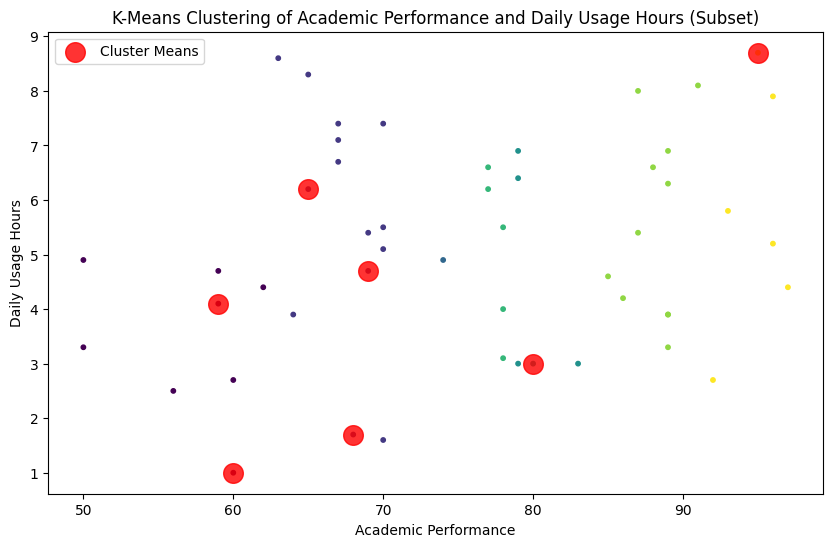

In [ ]:
# Create a scatter plot of the data points colored by their cluster assignment
plt.figure(figsize=(10, 6))
plt.scatter(performance_usage_subset[:, 0], performance_usage_subset[:, 1], c=cluster_assignments, cmap='viridis', s=10)

# Mark the final centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.8, label='Cluster Means')

plt.title('K-Means Clustering of Academic Performance and Daily Usage Hours (Subset)')
plt.xlabel('Academic Performance')
plt.ylabel('Daily Usage Hours')
plt.legend()
plt.show()